In [32]:
import pandas as pd
import numpy as np

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, r2_score

In [34]:
f=open('data.json')

In [35]:
import json

In [36]:
data=json.load(f)

In [37]:
df=pd.DataFrame(data)

In [38]:
df

,took,timed_out,_shards,hits,aggregations
total,198,False,12.0,"{'value': 80, 'relation': 'eq'}",NaN
successful,198,False,12.0,NaN,NaN
skipped,198,False,9.0,NaN,NaN
failed,198,False,0.0,NaN,NaN
max_score,198,False,NaN,None,NaN
hits,198,False,NaN,"[{'_index': '.ds-processstream-000005', '_type...",NaN
2,198,False,NaN,NaN,{'buckets': [{'key_as_string': '2023-10-22T02:...


In [39]:
d1=data['hits']['hits']

In [40]:
new_data=[]

for i in d1:
    i=i['_source']
    new_data.append({'cpu' : i['cpuUtilization(%)'],
                      'time' : i['processStartTime']})
new_data 

[{'cpu': 0.01, 'time': '2023-10-22T01:02:18Z'},
 {'cpu': 0.01, 'time': '2023-10-22T01:02:52Z'},
 {'cpu': 0, 'time': '2023-10-22T01:02:20Z'},
 {'cpu': 0.02, 'time': '2023-10-22T01:02:59Z'},
 {'cpu': 0.1, 'time': '2023-10-22T01:02:21Z'},
 {'cpu': 0.14, 'time': '2023-10-22T01:02:49Z'},
 {'cpu': 0.01, 'time': '2023-10-22T01:02:52Z'},
 {'cpu': 0.02, 'time': '2023-10-22T01:03:07Z'},
 {'cpu': 0.66, 'time': '2023-10-22T01:02:55Z'},
 {'cpu': 0.34, 'time': '2023-10-22T01:02:44Z'}]

In [41]:
d1=[]
for i in range(len(df['hits']['hits'])):
    d1.append({'time':df['hits']['hits'][i]['_source']['processStartTime'],
                'CPU':df['hits']['hits'][i]['_source']['cpuUtilization(%)']
})

d1


[{'time': '2023-10-22T01:02:18Z', 'CPU': 0.01},
 {'time': '2023-10-22T01:02:52Z', 'CPU': 0.01},
 {'time': '2023-10-22T01:02:20Z', 'CPU': 0},
 {'time': '2023-10-22T01:02:59Z', 'CPU': 0.02},
 {'time': '2023-10-22T01:02:21Z', 'CPU': 0.1},
 {'time': '2023-10-22T01:02:49Z', 'CPU': 0.14},
 {'time': '2023-10-22T01:02:52Z', 'CPU': 0.01},
 {'time': '2023-10-22T01:03:07Z', 'CPU': 0.02},
 {'time': '2023-10-22T01:02:55Z', 'CPU': 0.66},
 {'time': '2023-10-22T01:02:44Z', 'CPU': 0.34}]

In [42]:
df=pd.DataFrame(d1)

In [43]:
df

,time,CPU
0,2023-10-22T01:02:18Z,0.01
1,2023-10-22T01:02:52Z,0.01
2,2023-10-22T01:02:20Z,0.00
3,2023-10-22T01:02:59Z,0.02
4,2023-10-22T01:02:21Z,0.10
5,2023-10-22T01:02:49Z,0.14
6,2023-10-22T01:02:52Z,0.01
7,2023-10-22T01:03:07Z,0.02
8,2023-10-22T01:02:55Z,0.66
9,2023-10-22T01:02:44Z,0.34


In [44]:
# for i in range (len(df['time'])):
#     df['time'][i]=df['time'][i].timestamp()

In [45]:
df['time']=df['time'].replace('T',' ',regex=True)
df['time']=df['time'].replace('Z','',regex=True)
df

,time,CPU
0,2023-10-22 01:02:18,0.01
1,2023-10-22 01:02:52,0.01
2,2023-10-22 01:02:20,0.00
3,2023-10-22 01:02:59,0.02
4,2023-10-22 01:02:21,0.10
5,2023-10-22 01:02:49,0.14
6,2023-10-22 01:02:52,0.01
7,2023-10-22 01:03:07,0.02
8,2023-10-22 01:02:55,0.66
9,2023-10-22 01:02:44,0.34


In [46]:
df['time']=pd.to_datetime(df['time'],format='%Y-%m-%d %H:%M:%S')

In [47]:
df['time']=np.array(df['time'],dtype=float)

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns


In [49]:
df.dtypes

time    float64
CPU     float64
dtype: object

In [50]:
from sklearn import preprocessing 
# label_encoder=preprocessing.LabelEncoder() 

X=df[['time']]
y=df['CPU'] 

In [51]:
# df['time'] =label_encoder.fit_transform(df['time'])
# y=df['time'] 


In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [53]:
reg=LinearRegression() 

In [54]:
from datetime import datetime
s = '2021-01-18T11:18:10.833876+00:00'
dt = datetime.fromisoformat(s)


In [55]:
print(dt)

2021-01-18 11:18:10.833876+00:00


In [56]:
print(repr(dt))

datetime.datetime(2021, 1, 18, 11, 18, 10, 833876, tzinfo=datetime.timezone.utc)


In [57]:
reg.fit(X_train, y_train) 

LinearRegression()

In [58]:
y_pred=reg.predict(X_test)

In [59]:
print(y_pred)

[0.08396918 0.08310318]


In [62]:
accuracy=r2_score(y_test,y_pred)
# report=classification_report(y_test,y_pred.round())
print("Accuracy: {:.2f}%".format(accuracy*100))
# print(report) 

Accuracy: -59.60%


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\10725997\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


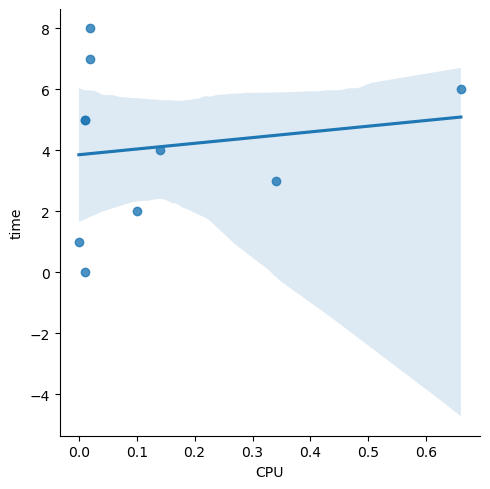

In [ ]:
sns.lmplot(x="CPU",y="time", data=df)

In [ ]:
import 